## Machine learning concepts

### The machine learning iterative loop
- Data — Getting the data. How to load it and put it in an `array` and/or `DataFrame`
- Processing — data exploration, inspection, cleaning, and feature engineering.
- Model – What is a model? Training a Scikit-Learn model.
- Results – assessing quality and performance metrics (accuracy, recall, F1, confusion matrices)
- Repeat – What can we do to improve performance?

## Basic Pandas

Introduces the concept of a `DataFrame` in Python. If you're familiar with R, it's pretty much the same idea! Useful cheat sheet [here](https://www.datacamp.com/community/blog/pandas-cheat-sheet-python#gs.59HV6BY)

The main purpose of Pandas is to allow easy manipulation of data in tabular form. Perhaps the most important idea that makes Pandas great for data science, is that it will always preserve **alignment** between data and labels.

In [1]:
import pandas as pd
import numpy as np

The most common data structure in Pandas is the `DataFrame`. A 2D structure that can hold various types of Python objects indexed by an `index` array (or multiple `index` arrays). Columns are usually labelled as well using strings.

An easy way to think about a `DataFrame` is if you imagine it as an Excel spreadsheet.

Let's define one using a numpy array:

In [2]:
arr =  [[1.23, 'sandstone'],
        [3.654, 'limestone'],
        [0.998, 'shale']]
arr

[[1.23, 'sandstone'], [3.654, 'limestone'], [0.998, 'shale']]

Make a `DataFrame` from `arr`

In [3]:
df = pd.DataFrame(arr, columns=['param1', 'lithology'])
df

,param1,lithology
0,1.230,sandstone
1,3.654,limestone
2,0.998,shale


In [4]:
df.loc[df['param1'] > 1,'param1']


0    1.230
1    3.654
Name: param1, dtype: float64

Accessing the data is a bit more complex than in the numpy array cases but for good reasons

In [5]:
df.loc[1,'lithology'] # .loc[index, column]

'limestone'

Add more data (row wise)

In [6]:
df.loc[3] = [5.6, 'shale']
df

,param1,lithology
0,1.230,sandstone
1,3.654,limestone
2,0.998,shale
3,5.600,shale


Add data (column wise) specifying the index locations

In [7]:
df.loc[0:2, 'one_more_column'] = [6,7,8]
df

,param1,lithology,one_more_column
0,1.230,sandstone,6.0
1,3.654,limestone,7.0
2,0.998,shale,8.0
3,5.600,shale,NaN


Add a new column with a "complete" list, array or series

In [8]:
df['second_new_colum'] = ["x","y","z","a"]
df

,param1,lithology,one_more_column,second_new_colum
0,1.230,sandstone,6.0,x
1,3.654,limestone,7.0,y
2,0.998,shale,8.0,z
3,5.600,shale,NaN,a


Pandas also reads files from disk in tabular form ([here](http://pandas.pydata.org/pandas-docs/version/0.20/io.html)'s a list of all the formats that it can read and write). A very common one is CSV, so let's load one!

In [9]:
df = pd.read_csv("data/2016_ML_contest_training_data.csv")
df.head()

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
0,3,A1 SH,SHRIMPLIN,2793.0,77.45,0.664,9.9,11.915,4.6,1,1.000
1,3,A1 SH,SHRIMPLIN,2793.5,78.26,0.661,14.2,12.565,4.1,1,0.979
2,3,A1 SH,SHRIMPLIN,2794.0,79.05,0.658,14.8,13.050,3.6,1,0.957
3,3,A1 SH,SHRIMPLIN,2794.5,86.10,0.655,13.9,13.115,3.5,1,0.936
4,3,A1 SH,SHRIMPLIN,2795.0,74.58,0.647,13.5,13.300,3.4,1,0.915


# Inspecting the `DataFrame`

Using the `DataFrame` with well log information loaded before, we can make a summary using the `describe()` method of the `DataFrame` object

In [10]:
df.describe()

,Facies,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
count,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000
mean,4.422030,2875.824567,66.135769,0.642719,3.559642,13.483213,3.725014,1.498453,0.520287
std,2.504243,131.006274,30.854826,0.241845,5.228948,7.698980,0.896152,0.500075,0.286792
min,1.000000,2573.500000,13.250000,-0.025949,-21.832000,0.550000,0.200000,1.000000,0.010000
25%,2.000000,2791.000000,46.918750,0.492750,1.163750,8.346750,3.100000,1.000000,0.273000
50%,4.000000,2893.500000,65.721500,0.624437,3.500000,12.150000,3.551500,1.000000,0.526000
75%,6.000000,2980.000000,79.626250,0.812735,6.432500,16.453750,4.300000,2.000000,0.767250
max,9.000000,3122.500000,361.150000,1.480000,18.600000,84.400000,8.094000,2.000000,1.000000


In [11]:
df = df.dropna()

## Adding more data to the `DataFrame`

In [12]:
def rhob(phi_rhob, Rho_matrix= 2650.0, Rho_fluid=1000.0):
    """
    Rho_matrix (sandstone) : 2.65 g/cc
    Rho_matrix (Limestome): 2.71 g/cc
    Rho_matrix (Dolomite): 2.876 g/cc
    Rho_matrix (Anyhydrite): 2.977 g/cc
    Rho_matrix (Salt): 2.032 g/cc

    Rho_fluid (fresh water): 1.0 g/cc (is this more mud-like?)
    Rho_fluid (salt water): 1.1 g/cc
    see wiki.aapg.org/Density-neutron_log_porosity
    returns density porosity log """
    
    return Rho_matrix*(1 - phi_rhob) + Rho_fluid*phi_rhob


In [13]:
phi_rhob = 2*(df.PHIND/100)/(1 - df.DeltaPHI/100) - df.DeltaPHI/100
calc_RHOB = rhob(phi_rhob)
df['RHOB'] = calc_RHOB

In [14]:
df.describe()

,Facies,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS,RHOB
count,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000
mean,4.422030,2875.824567,66.135769,0.642719,3.559642,13.483213,3.725014,1.498453,0.520287,2248.911086
std,2.504243,131.006274,30.854826,0.241845,5.228948,7.698980,0.896152,0.500075,0.286792,271.200640
min,1.000000,2573.500000,13.250000,-0.025949,-21.832000,0.550000,0.200000,1.000000,0.010000,-159.040816
25%,2.000000,2791.000000,46.918750,0.492750,1.163750,8.346750,3.100000,1.000000,0.273000,2153.808486
50%,4.000000,2893.500000,65.721500,0.624437,3.500000,12.150000,3.551500,1.000000,0.526000,2315.516920
75%,6.000000,2980.000000,79.626250,0.812735,6.432500,16.453750,4.300000,2.000000,0.767250,2420.208001
max,9.000000,3122.500000,361.150000,1.480000,18.600000,84.400000,8.094000,2.000000,1.000000,2812.733802


We can define a Python dictionary to relate facies with the integer label on the `DataFrame`

In [15]:
facies_dict = {1:'sandstone', 2:'c_siltstone', 3:'f_siltstone', 4:'marine_silt_shale',
               5:'mudstone', 6:'wackestone', 7:'dolomite', 8:'packstone', 9:'bafflestone'}

Let's add a new column with the name version of the facies

In [16]:
df["s_Facies"] = df.Facies.map(lambda x: facies_dict[x])

In [17]:
df.head()

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS,RHOB,s_Facies
0,3,A1 SH,SHRIMPLIN,2793.0,77.45,0.664,9.9,11.915,4.6,1,1.000,2376.951554,f_siltstone
1,3,A1 SH,SHRIMPLIN,2793.5,78.26,0.661,14.2,12.565,4.1,1,0.979,2401.030769,f_siltstone
2,3,A1 SH,SHRIMPLIN,2794.0,79.05,0.658,14.8,13.050,3.6,1,0.957,2388.742254,f_siltstone
3,3,A1 SH,SHRIMPLIN,2794.5,86.10,0.655,13.9,13.115,3.5,1,0.936,2376.684495,f_siltstone
4,3,A1 SH,SHRIMPLIN,2795.0,74.58,0.647,13.5,13.300,3.4,1,0.915,2365.351156,f_siltstone


## Visual exploration of the data

We can easily visualize the properties of each facies and how they compare using a `PairPlot`. The library `seaborn` integrates with matplotlib to make these kind of plots easily.

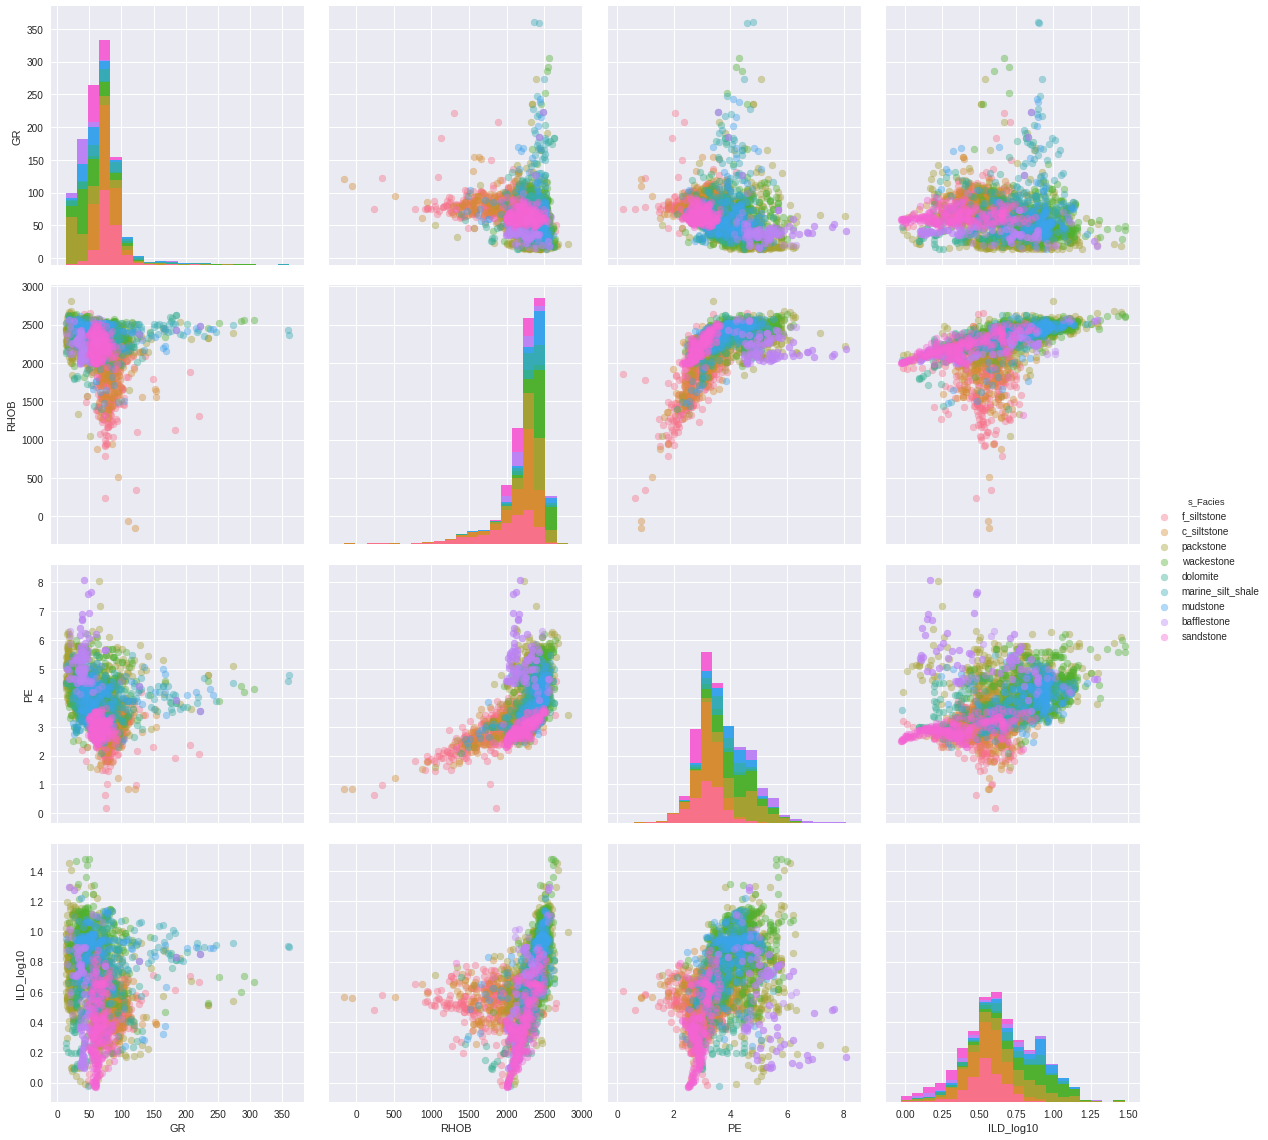

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

g = sns.PairGrid(df, hue="s_Facies", vars=['GR','RHOB','PE','ILD_log10'], size=4)

g.map_upper(plt.scatter,**dict(alpha=0.4))  
g.map_lower(plt.scatter,**dict(alpha=0.4))
g.map_diag(plt.hist,**dict(bins=20))  
g.add_legend()

It is very clear that it's hard to separate these facies in feature space. Let's just select a couple of facies and using Pandas, select the rows in the `DataFrame` that contain information about those facies 

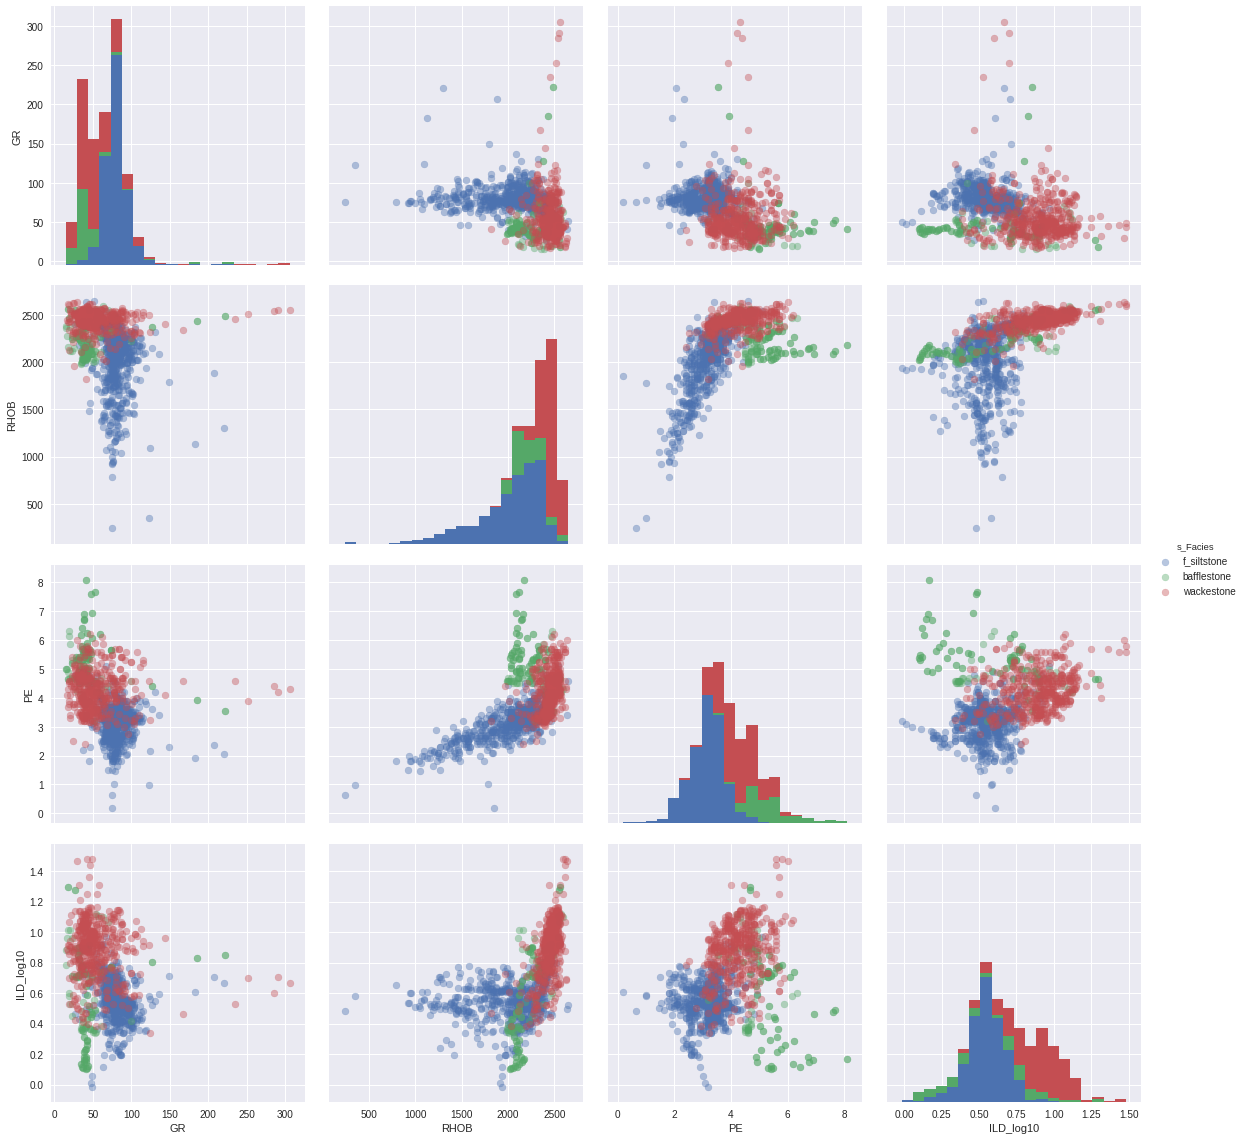

In [19]:
selected = ['f_siltstone', 'bafflestone', 'wackestone']

dfs = pd.concat(list(map(lambda x: df[df.s_Facies == x], selected)))

g = sns.PairGrid(dfs, hue="s_Facies", vars=['GR','RHOB','PE','ILD_log10'], size=4)  
g.map_upper(plt.scatter, alpha=0.4)
g.map_lower(plt.scatter, alpha=0.4)
g.map_diag(plt.hist,**dict(bins=20))  
g.add_legend()

---
# Feature engineering

Add PCA components? Average logs as function of Depth? ...

---
# Scikit-learn classifiers

Let's create a model that classifies between those three classes

### For a classifier comparison check the source code [here](http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html)

<img src="data/ML_classifier_comparison_sklearn.png"></img>


*Choosing the right estimator:* Often the hardest part of solving a machine learning problem can be finding the right estimator for the job.
Different estimators are better suited for different types of data and different problems.

In [20]:
# Make X and y
X = dfs[['GR','RHOB','PE','ILD_log10']].as_matrix()
y = dfs['s_Facies'].values

Some methods expect the data to be normalized. It's sometimes a good idea of normalizing it no matter which method you try

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

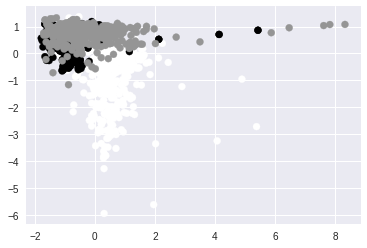

In [22]:
plt.scatter(X[:,0], X[:,1], c=dfs['Facies'].values)

Split the data into a training set and a test set. **This is a key step in the process**

In [23]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

A fairly common method for classifying data is to use the _k-nearest neighbors algorithm_. The label of the object in question is determined by the neighbouring data points in the feature space used. Its most important parameter, `k`, is the number of neighbors you include to make a membership decision.

In [24]:
from sklearn.neighbors import KNeighborsClassifier

The next block is all you need to train a classifier model!

In [25]:
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

Before we can move on to make predictions we need to create validation routines to make sure that the model we trained is _good_ and produces reasonble results. The most basic test is to look at how many good predictions we would make if we predict on our `Test` data.

In [26]:
score = clf.score(X_test, y_test)
print("The precision is {}%".format(np.round(score*100)))

The precision is 91.0%


This scoring is one of the _metrics_ we can use to check the quality of the predictions. There are a large number of different metrics and depending on your data and problem you may need to find the one that adjusts better to your needs. Typically, a more robust metric that is often used is called `F1`. It combines the `precision` score and a `recall` score (how many true positive predictions were made). Scikit-learn gives a nice summary of these three metrics using `classification_report`.

In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_test, clf.predict(X_test), digits=3))

             precision    recall  f1-score   support

bafflestone      0.821     0.902     0.860        51
f_siltstone      0.952     0.930     0.941       213
 wackestone      0.890     0.890     0.890       145

avg / total      0.914     0.912     0.912       409



Depending on you requirements, this results might be good enough to deploy this model and use it on a "Machine Learning Pipeline" product but it is often not the best model you can get. Each method has a set of parameters (also known as _hyperparameters_) that can be tweaked to tune the training.

For the `KNeighborsClassifier` there are a few of these parameters:

In [28]:
KNeighborsClassifier()

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

For this particular method, the most important parameter to adjust is `n_neighbors` (it's the `K` in the `KNeighborsClassifier`!). Unfortunately, there's no rule that tells you what's the optimal value of `k`. To overcome this we can train many models with different values of `k` and compare the results of classifications applied to the _Test_ data.

In [29]:
nns = np.arange(1,60,2) # Generated array of values of k to try

Loop over each value in `nns` and store the `F1 Score`

In [30]:
from sklearn.metrics import f1_score

acc = []
for n in nns:
    clf = KNeighborsClassifier(n)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    score = f1_score(y_pred, y_test, average='weighted')
    acc.append(score)

What value of `n` gives us the best result?

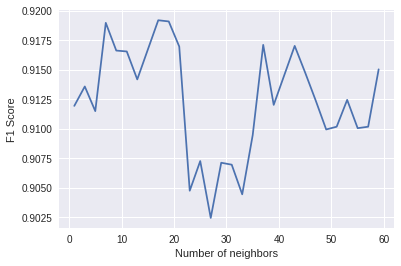

In [31]:
plt.plot(nns,acc)
_ = plt.xlabel('Number of neighbors')
_ = plt.ylabel('F1 Score')

Train a `KNeighborsClassifier` using the optimal number of nearest neighbors and print its classification report

In [32]:
clf = KNeighborsClassifier(19)
clf.fit(X_train, y_train)

print("{:12} {}".format("KNN","-"*15))
print(classification_report(y_test, clf.predict(X_test), digits=3))

KNN          ---------------
             precision    recall  f1-score   support

bafflestone      0.815     0.863     0.838        51
f_siltstone      0.953     0.953     0.953       213
 wackestone      0.908     0.890     0.899       145

avg / total      0.920     0.919     0.920       409



## More methods to train models!

Let's pick 3 different classifiers to train different models and then compare how well they perform

In [33]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

In [34]:
classifiers = [
    SVC(),
    RandomForestClassifier(),
    MLPClassifier()
    ]

names = ["Linear SVM", "RandomForest", "Neural Network"]

In [35]:
classifiers

[SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
   decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
   max_iter=-1, probability=False, random_state=None, shrinking=True,
   tol=0.001, verbose=False),
 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
             max_depth=None, max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
             oob_score=False, random_state=None, verbose=0,
             warm_start=False),
 MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
        beta_2=0.999, early_stopping=False, epsilon=1e-08,
        hidden_layer_sizes=(100,), learning_rate='constant',
        learning_rate_init=0.001, max_iter=200, momentum=0.9,
        nesterovs_momentum=True, power_t=0.5, random_state=None,
        shuffle

Let's iterate over these classifiers and print common metrics to evaluate the performance of each model using the testing dataset we defined before

In [36]:
# iterate over classifiers
for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    print("{:12} {}".format(name,"-"*15))
    print(classification_report(y_test, clf.predict(X_test), digits=3))

Linear SVM   ---------------
             precision    recall  f1-score   support

bafflestone      0.920     0.902     0.911        51
f_siltstone      0.948     0.934     0.941       213
 wackestone      0.879     0.903     0.891       145

avg / total      0.920     0.919     0.920       409

RandomForest ---------------
             precision    recall  f1-score   support

bafflestone      0.895     1.000     0.944        51
f_siltstone      0.943     0.930     0.936       213
 wackestone      0.901     0.883     0.892       145

avg / total      0.922     0.922     0.922       409

Neural Network ---------------
             precision    recall  f1-score   support

bafflestone      0.935     0.843     0.887        51
f_siltstone      0.952     0.934     0.943       213
 wackestone      0.857     0.910     0.883       145

avg / total      0.916     0.914     0.915       409



/home/nam/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Try more methods!

# Parameter selection

Many of the models can be improved (or worsened) by changing the parameters that internally make the method work. It's always a good idea to check the documentation of each model (e.g. RandomForestClassifier [docs](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)). This process is usually called _hyperparameter tuning_.

Scikit-learn offers a simple way to test different parameters for each model through a function called `GridSearchCV`

In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer as msc

# Select the parameters and values for each one to test
parameters = {'n_estimators':np.arange(1,100,5),
              'max_depth':np.arange(1,50,5)}

rfc = RandomForestClassifier()

clf = GridSearchCV(rfc, parameters, scoring = msc(f1_score,**{'average':'weighted'}), cv=3, n_jobs=8)

clf.fit(X_train, y_train)

/home/nam/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/nam/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/nam/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/nam/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/nam/anaconda2/lib/python2.7/site-p

GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=8,
       param_grid={'n_estimators': array([ 1,  6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81,
       86, 91, 96]), 'max_depth': array([ 1,  6, 11, 16, 21, 26, 31, 36, 41, 46])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(f1_score, average=weighted), verbose=0)

How does the parameter space look like with respect to the score of the classifier?

In [38]:
scores = clf.cv_results_['mean_test_score']
max_depths = clf.cv_results_["param_max_depth"].data.astype(int)
n_estimators = clf.cv_results_["param_n_estimators"].data.astype(int)

In [39]:
X_size = len(np.unique(max_depths))
Y_size = len(np.unique(n_estimators))
X = max_depths.reshape((X_size, Y_size))
Y = n_estimators.reshape((X_size, Y_size))
Z = scores.reshape((X_size, Y_size))

In [40]:
import scipy.interpolate
import sklearn.preprocessing

# Set up a regular grid of interpolation points
xi, yi = np.linspace(X.min(), X.max(), 100), np.linspace(Y.min(), Y.max(), 100)
xi, yi = np.meshgrid(xi, yi)

# Interpolate
rbf = scipy.interpolate.Rbf(X, Y, Z, function='linear')
zi = rbf(xi, yi)

plt.imshow(zi, vmin=0.8, vmax=Z.max(), origin='lower',
           extent=[X.min(), X.max(), Y.min(), Y.max()], aspect=X.max()/Y.max())
# plt.scatter(X, Y, c=Z)
plt.colorbar()

_ = plt.ylabel('n_estimators')
_ = plt.xlabel('max_depth')

ValueError: 'box_aspect' and 'fig_aspect' must be positive

`clf` can now tell us the best parameters to use with our `RandomForestClassifier`

In [54]:
clf.best_params_

{'max_depth': 46, 'n_estimators': 56}

In [55]:
clf.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=46, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=56, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

The nice thing about `scikit-learn`'s methods is that they're all consistent and behave in the same way. Notice how`GridSearchCV` was `.fit()`. That means that we can use it to `.predict()` and it will automatically use the best set of parameters!

In [56]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred, digits=3))

             precision    recall  f1-score   support

bafflestone      0.926     0.980     0.952        51
f_siltstone      0.961     0.925     0.943       213
 wackestone      0.893     0.924     0.908       145

avg / total      0.933     0.932     0.932       409



It's also helpful to summarize the prediction tests using a [Confusion Matrix](https://en.wikipedia.org/wiki/Confusion_matrix). Scikit-learn has a function for that!

In [57]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[ 50,   0,   1],
       [  1, 197,  15],
       [  3,   8, 134]])

But as you can see, it's not very clear... What does each row/column represent? We can help a bit:

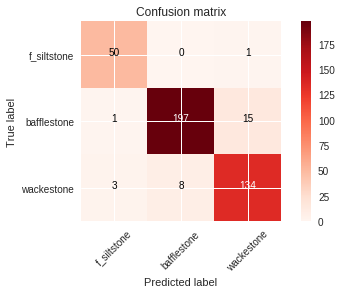

In [58]:
# itertoools is a standard library for all kinds of handy iterator manipulation
import itertools

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)

title = 'Confusion matrix'
cmap = plt.cm.Reds

# Plot non-normalized confusion matrix
plt.figure()
plt.imshow(cnf_matrix, interpolation='nearest', cmap=cmap)
plt.title(title)
plt.colorbar()
tick_marks = np.arange(len(selected))
plt.xticks(tick_marks, selected, rotation=45)
plt.yticks(tick_marks, selected)

# Print the support numbers inside the plot
thresh = cnf_matrix.max() / 2.
for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
    plt.text(j, i, format(cnf_matrix[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cnf_matrix[i, j] > thresh else "black")

plt.tight_layout()
_ = plt.ylabel('True label')
_ = plt.xlabel('Predicted label')

Sometimes is better to normalize the confusion matrix in cases where support numbers are highly unbalanced. Write a version of the confusion matrix plot with the support values normalized!

In [59]:
from sklearn.externals import joblib

In [60]:
joblib.dump(clf, 'facies_model.pkl')

['facies_model.pkl']

How do you load a saved model?

In [61]:
clf = joblib.load('facies_model.pkl')

In [62]:
X_test.shape

(409, 4)

In [63]:
import requests

import numpy as np
multipart_form_data =  {
                        'file': ('npArray', X_test.flatten().tobytes(), 'application/octet-stream'),
                        'shape': ('arrShape', str(X_test.shape), 'text/plain')
                        }

res = requests.post(url='http://0.0.0.0:5000/predict_from_array',
                         files=multipart_form_data)

encoded_predictions = np.frombuffer(res.content, dtype=np.int8)

In [51]:
import sklearn.preprocessing

In [64]:
encoded_predictions

array([1, 1, 2, 2, 2, 0, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 0, 1, 1, 2,
       2, 1, 1, 2, 1, 1, 2, 0, 1, 1, 2, 2, 1, 0, 1, 1, 2, 1, 0, 2, 1, 1, 1,
       2, 1, 1, 1, 1, 2, 2, 1, 0, 0, 2, 1, 2, 2, 1, 0, 1, 2, 2, 0, 1, 2, 2,
       2, 2, 2, 2, 0, 1, 2, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1,
       0, 1, 1, 1, 2, 2, 1, 0, 2, 1, 0, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 0,
       2, 1, 0, 0, 1, 2, 0, 2, 2, 2, 1, 1, 1, 1, 0, 1, 1, 2, 1, 2, 2, 1, 1,
       2, 1, 1, 2, 2, 1, 1, 0, 1, 0, 0, 2, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 0, 2, 1, 2, 0, 1, 1, 1, 2, 2, 2, 2, 1, 2, 0, 1, 2, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 2, 0, 0, 1, 1, 1, 2, 1, 2, 1, 0, 1, 1, 2, 1, 1, 0, 0, 2,
       2, 0, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2, 0, 1, 1,
       1, 1, 2, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1,
       2, 2, 1, 2, 2, 1, 1, 0, 1, 1, 1, 2, 2, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2,
       1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 1, 1, 2, 1, 2, 2,
       1, 1,

In [65]:
enc = joblib.load('facies_encoder.pkl')
enc.inverse_transform(encoded_predictions)

ValueError: unsupported pickle protocol: 3

---
# Where to go next?

- More data!
- [XGBoost](https://xgboost.readthedocs.io/en/latest/)
- [LightGBM](https://github.com/Microsoft/LightGBM)
- If you want to get started on Neural Networks, [Keras](https://keras.io/) provides a scikit-learn type of experience

<hr />

<p style="color:gray">©2017 Agile Geoscience. Licensed CC-BY.</p>